In [2]:
from IPython.display import Image

# Global Explanations of Breast Cancer Severity Models using Variable Importance Plots

The UCI ML Breast Cancer Wisconsin dataset, provided in sci-kit learn package, was created based on results of FNA procedure which 569 patients underwent to asses the severity of their breast cancer. Because the FNA procedure results in an image, the experts encoded 30 variables out of it to create tabular data. Detailed information, including simple exploratory analysis and modelling, can be found in [previous report on this topic](https://github.com/MI2-Education/InterpretableMachineLearning2022/blob/main/Homeworks/HW1/ZuzannaKwiatkowska/zuzanna_kwiatkowska_report.ipynb) or [Sci-Kit Learn Documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

The target variable in this dataset is binary, meaning it encodes:
- patients with malignant tumor as 0,
- patients with benign tumor as 1,

and there are no other classes of interest present in this task.

The aim of this report is to:
- train 6 different models to solve the task (XGBoost and MLP, each with 3 normalisation variants),
- generate VIPs for each of the model and compare them model- and transformation-wise.

## Comparison of 3 normalisation variants for XGBoost

As a first differentiation criterion I decided to use various normalisation transformations on the data to see if the variable importance is dependent on variable absolute value. I used:
- no normalisation/standardization procedure,
- min-max normalisation which scales each feature to (0, 1) range,
- standardization which scales each feature to mean 0 and variance 1.

Results shown below are for XGBoost model with default parameters.

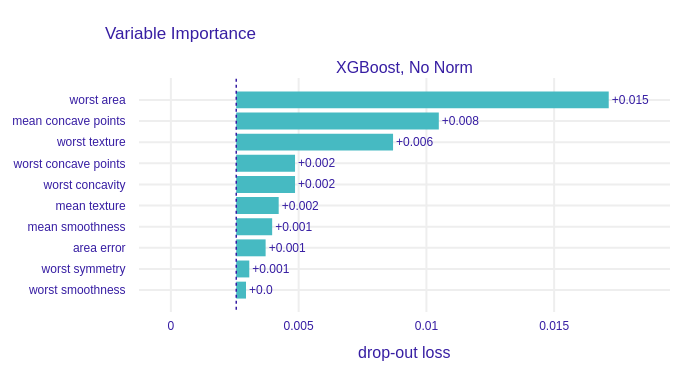

In [3]:
Image(filename="xgboost_no_norm.png")

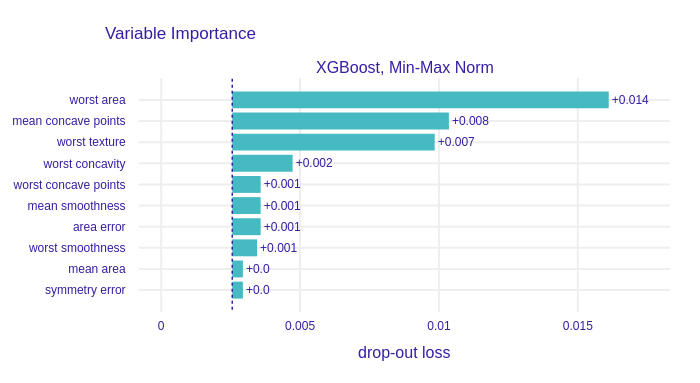

In [4]:
Image(filename="xgboost_min_max_norm.png")

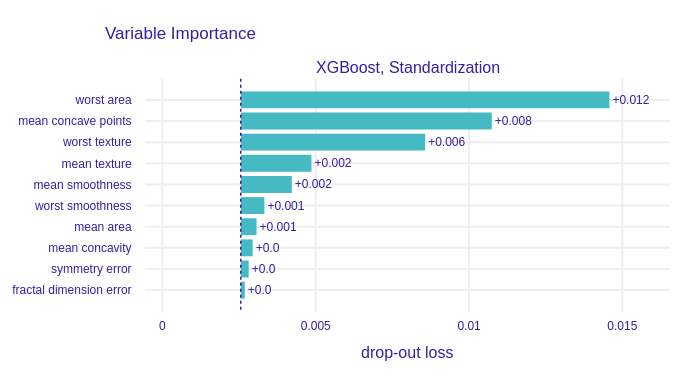

In [6]:
Image(filename="xgboost_standard.png")

As we can see all 3 results doesn't differ at least in terms of 3 most important variables (not only in terms of their ocurrence but also importance factor). Moreover there is only a slight difference in importance between lack of normalisation and min-max normalisation, but stronger discrepancy is seen in features in standardization procedure.

## Comparison of 3 normalisation variants for MLP

A similar procedure was conducted for MLP model.

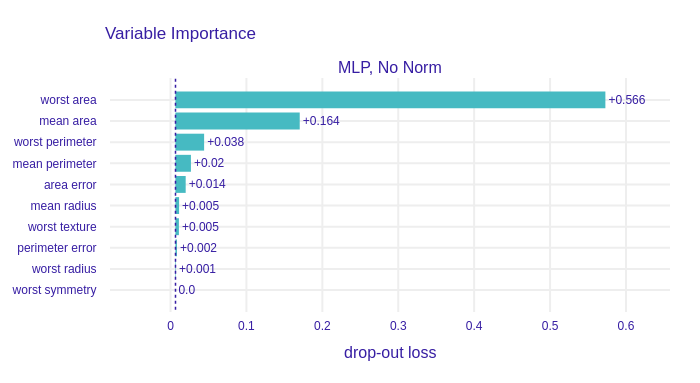

In [7]:
Image(filename="mlp_no_norm.png")

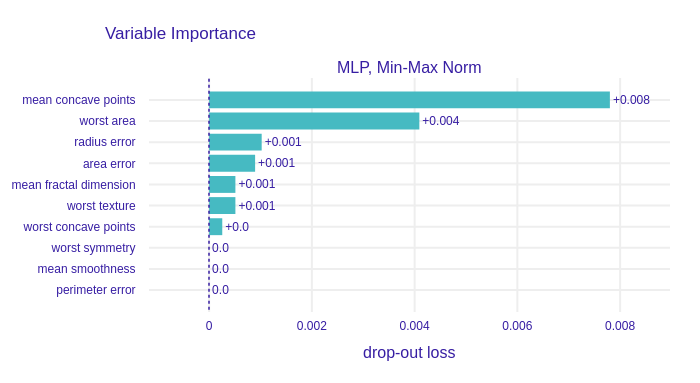

In [8]:
Image(filename="mlp_min_max_norm.png")

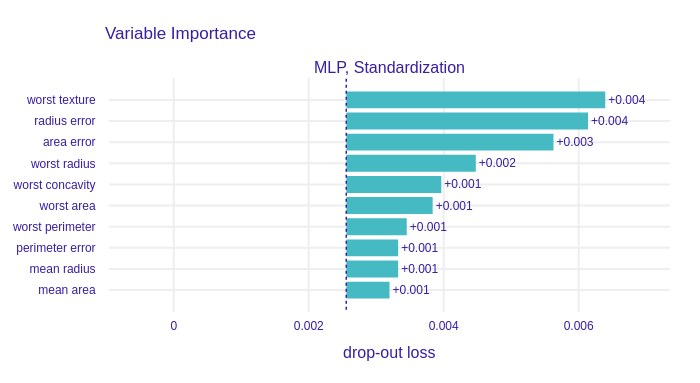

In [9]:
Image(filename="mlp_standard.png")

Here, contrary to XGBoost, the results differ immensely, showing the neural network is very prone to changes due to the values range in the data. 

When the data undergo no normalisation procedure, there are 2 largely significant variables `worst area` and `mean area` which network focuses on. Once we add min-max normalisation, the significance factors change immensely and importance of 2 other features increases: `mean concave points` and `radius error`. Even though we see the peak in the most important variable here, the factors have more or less similar importance factors for all the features. Last but not least, in standardization procedure we see yet another feature as most important, `worst texture`, and importance factors are even more close to one another in terms of their values.

## Comparison between XGBoost and MLP

Due to the fact that XGBoost was almost similar for all 3 transformations and MLP differed immensely for all 3, we can already expect that XGBoost and MLP will differ from each other in most of the pairs (XGBoost, MLP) for the same transformation. This is why I decided to show this pair/transformation which is the most stable between those models (at least for the most important features).

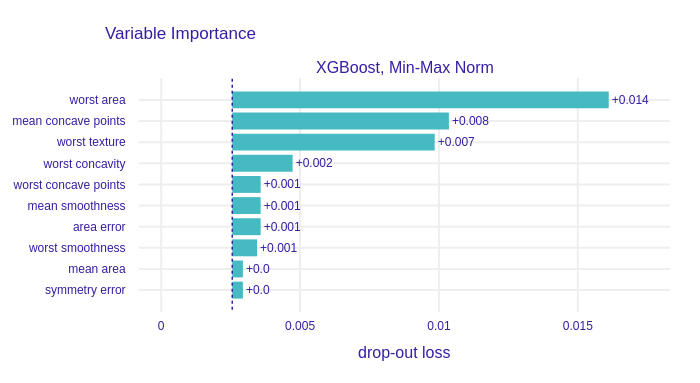

In [10]:
Image(filename="xgboost_min_max_norm.png")

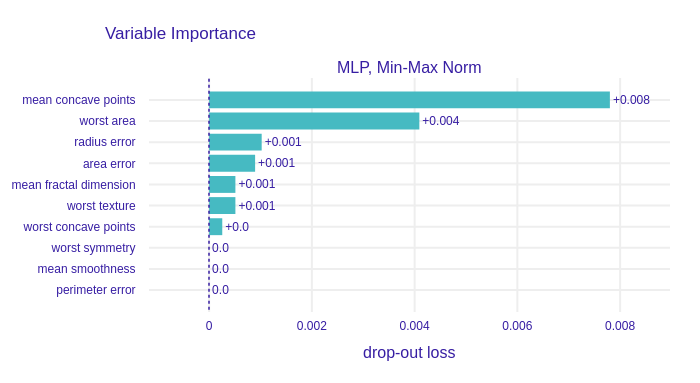

In [11]:
Image(filename="mlp_min_max_norm.png")

As we can see, for both of the models with min-max normalisation, 2 out of 3 most important features are the same. However, if we analyse the importance factor and how it is distributed amongst the features, we can clearly see that in MLP only 2 features play an important role, whereas for XGBoost there is 1 additional feature at play. Nonetheless the further features seem to play no role at all in both of the models.

## Conclusions

Based on this analysis we can see that variable importance plots and feature importance can be both stable and differ between the models and transformations. It appears in the case of Breast Cancer dataset, MLP was very sensitive to the features range in the dataset (which is concurrent with the neural networks theory), although the overal stability of XGBoost in terms of this aspect is very interesting.   

Moreover, now after generating both local and global explanations, we can see that the initial feature choice in the first report, based only on data structure (using correlation and mutual information), missed significant features that were important both for discovering malignant patients locally and in global feature importance. This could indicate that in the target variable imbalance scenario it might be better to choose features in an iterative improvement of the model instead of based on their inherent structure.